In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

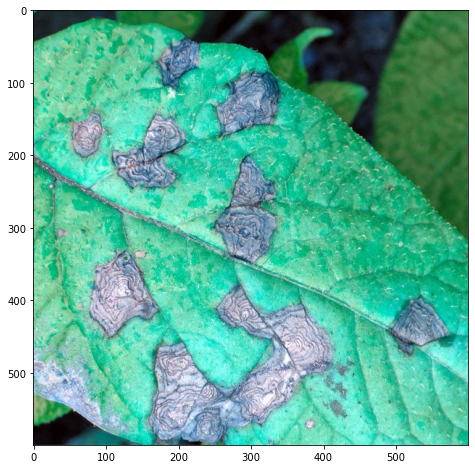

In [119]:
img = cv2.imread('./leaf.jpg')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

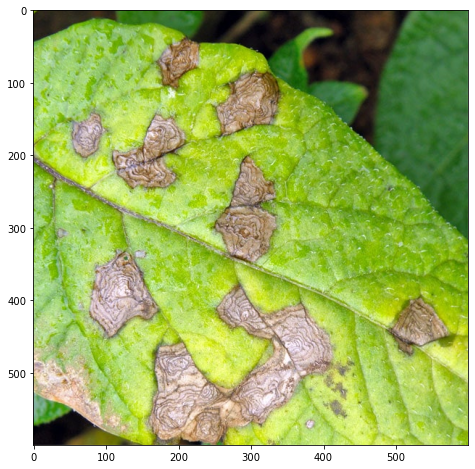

In [120]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

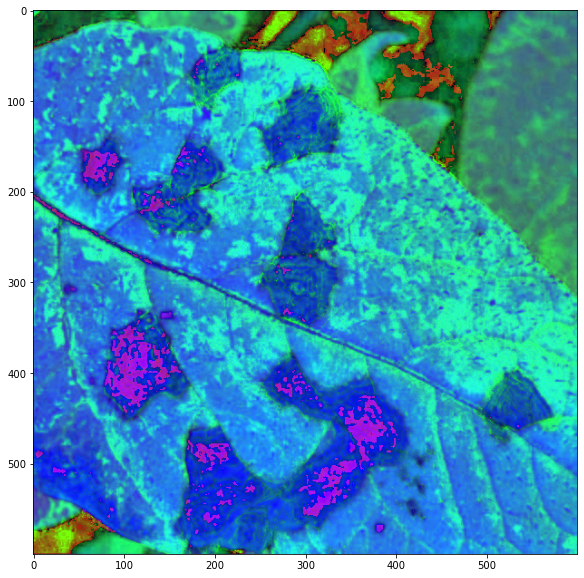

In [121]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.imshow(hsv_img)

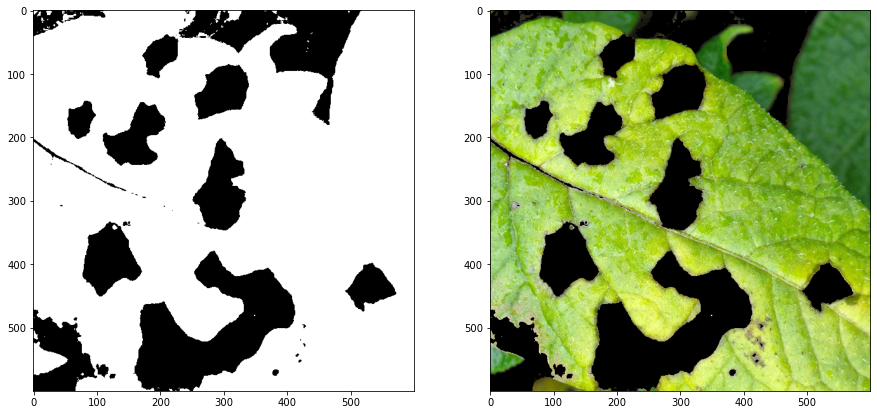

In [122]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

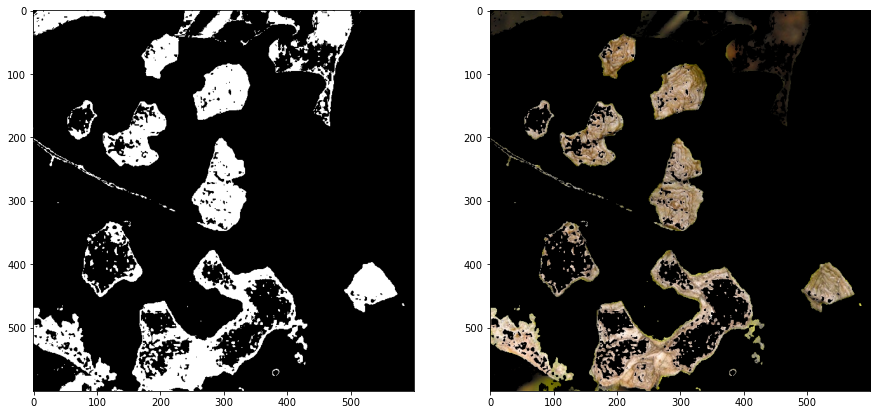

In [123]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

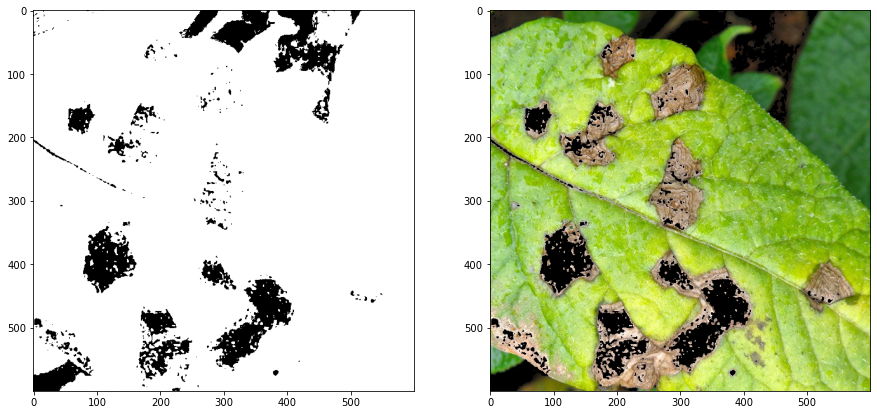

In [124]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

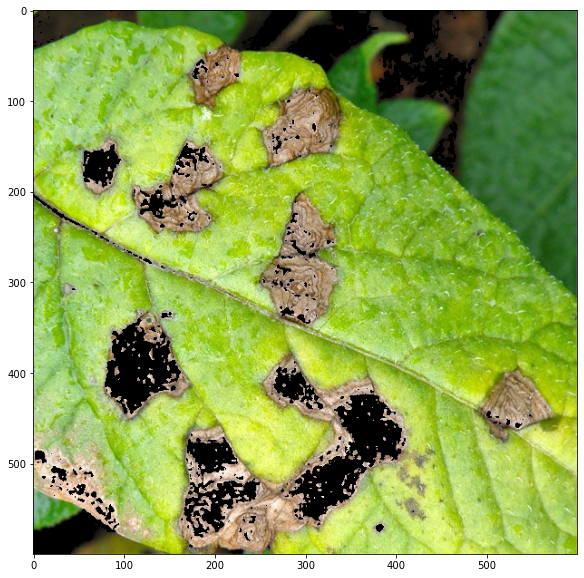

In [126]:
plt.figure(figsize=(10,10))
plt.imshow(final_result)

In [10]:
### Now Come the Image manipulation part:

In [ ]:
##Rotate and flip image

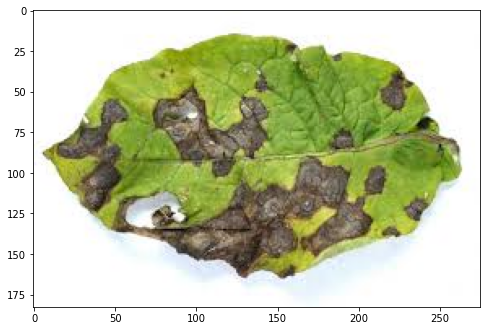

In [127]:
#Input image
img1 = cv2.imread('./image1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img1)
plt.show()

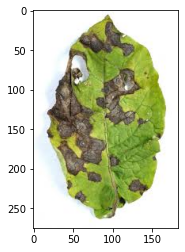

In [128]:
#Rotate 90 degree clockwise
img1_rotate_90_clockwise = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img1_rotate_90_clockwise)

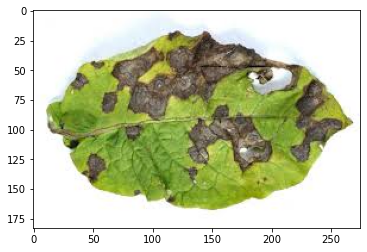

In [129]:
#Rotate 180 degree
img1_rotate_180 = cv2.rotate(img1, cv2.ROTATE_180)
plt.imshow(img1_rotate_180)

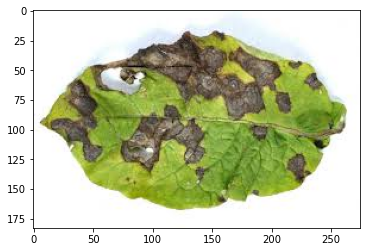

In [130]:
#Flipped Up
img1_flip_ud = cv2.flip(img1, 0)
plt.imshow(img1_flip_ud)

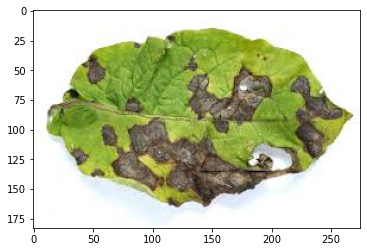

In [131]:
#Flipped Right
img1_flip_lr = cv2.flip(img1, 1)
plt.imshow(img1_flip_lr)

In [56]:
## Trimming with slice:

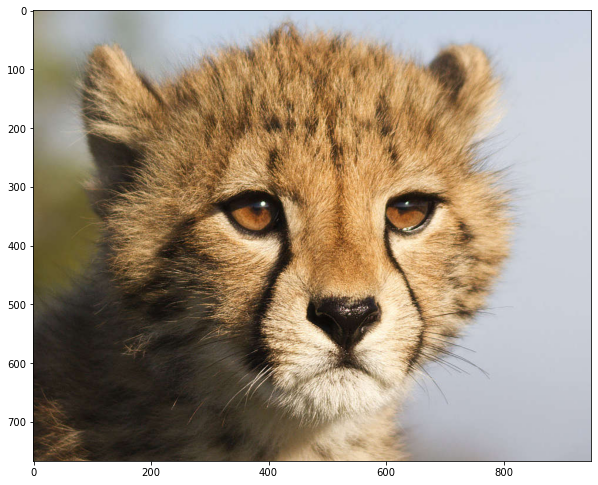

In [132]:
#Image Read
img3 = cv2.imread('./cheetah.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img3)

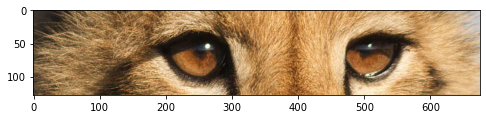

In [133]:
#Trimming
def trim(array, x, y, width, height):
    return array[y:y + height, x:x+width]
img3_trim2 = trim(img3, 128, 275, 675, 128)
plt.figure(figsize=(8,8))
plt.imshow(img3_trim2)

In [60]:
## Paste with slice using Numpy

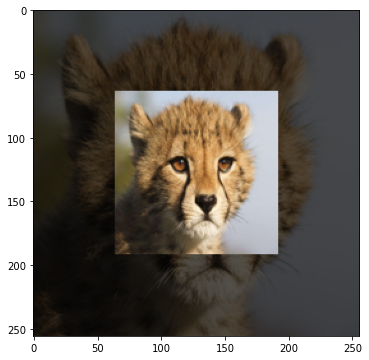

In [134]:
import numpy as np
from PIL import Image
#Read Image in np and resize
src = np.array(Image.open('./cheetah.jpg').resize((128, 128)))
dst = np.array(Image.open('./cheetah.jpg').resize((256, 256))) // 3 #devide by 3 to darken backgrond image
#pasting one on another
dst_copy = dst.copy()
dst_copy[64:192, 64:192] = src
plt.figure(figsize=(6,6))
plt.imshow(dst_copy)

In [62]:
## Alpha blending with OpenCV: cv2.addWeighted()

In [135]:
#image read
src1 = cv2.imread('./cheetah.jpg')
src1 = cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
src2 = cv2.imread('./flower1.jpg')
src2 = cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)
#Resize on imag in respect to another
#adding weight

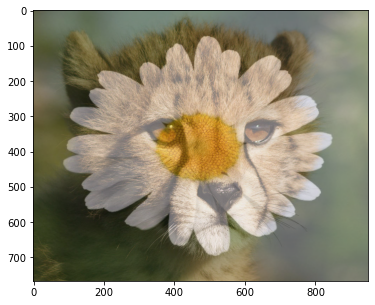

In [136]:
src2 = cv2.resize(src2, src1.shape[1::-1])
dst = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
plt.figure(figsize=(6,6))
plt.imshow(dst)

In [28]:
# Masking with OpenCV: cv2.bitwise_and()

In [137]:
src1 = cv2.imread('./cheetah.jpg')
src1 = cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
src3 = cv2.imread('./horse.png')
#Resize on imag in respect to another
#Bitwise_and operation


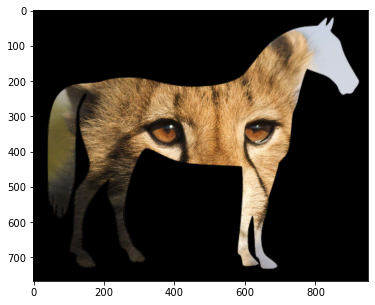

In [139]:
src3 = cv2.resize(src3, src1.shape[1::-1])
dst1 = cv2.bitwise_and(src1, src3)
plt.figure(figsize=(6,6))
plt.imshow(dst1)